In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os

os.environ['USE_PYGEOS']='0'

# Display all columns in the df
pd.set_option('display.max_columns', None)
# Set the float format to display numbers in standard decimal notation
pd.options.display.float_format = '{:.5f}'.format

c:\Users\anton\anaconda3\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\anton\AppData\Local\Temp/ipykernel_11048/595501156.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/l

In [3]:
#Read dataset
df=pd.read_csv(r"C:\Users\anton\Desktop\Master-Oppgave\Anton\Kode\Statistics\Code\graph_w_CS_and_volume_wCorrectLength.csv")

In [4]:
df.head()
# df=df.drop(["Unnamed: 0"], axis=1)
# print(df.columns)

,u,v,length,traffic_id,volume,Name,CS_id,geometry,Level,PowerKW_list,Number_Of_Chargers,1,2,3,4,5,6,7,8,9,10,11,12
0,794436,735703,11865.76308,59192V1878201,34276,Frydenlund P-hus,243271,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000
1,794436,735703,11865.76308,59192V1878201,34276,Tjuvholmen Parkering,215792,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000
2,794436,735703,11865.76308,59192V1878201,34276,"Recharge Filipstad, Oslo",243223,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 150.0, 50.0, 150.0, 50.0, 150.0, 50.0, ...",16,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000
3,794436,735703,11865.76308,59192V1878201,34276,Recharge K89,243329,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 50.0, 50.0, 50.0, 22.0, 22.0, 22.0, 22....",11,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000
4,794436,735703,11865.76308,59192V1878201,34276,Idas vei,173544,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]",8,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000


In [5]:
#Adding range of vehicles, lot of analysis to be done here (can also create custom ranges for for different regions...)
df["range"]=300

### Metrics derived from mean temperature of primary cities from all regions of Norway from every month of the year. Mean temp multiplied by loss factor 

In [6]:
#Creating dictionairy showcasing the loss of range per season 
temp_cost={'january':0.8, 
           'february':0.8, 
           'march':0.8, 
           'april':0.9, 
           'may':1, 
           'june':1.05, 
           'july':1.1, 
           'august':1.1, 
           'september':1.02, 
           'october':0.92, 
           'november':0.82, 
           'december':0.8} 

#Methodology for finding actual range of EV's can be improved. Take into account battery aging, and recommended charging to 80% (actual percentage can be researched)

In [7]:
#Removing this for now, might have misunderstood the calculation of actual length. Instead of adjusting range, we adjust length of edge
#Part of Method 1
for key in temp_cost.keys():
   df.loc[:, f'actual_range_{key[:3].lower()}'] = df['range'] * temp_cost[key]


In [8]:
# Loop through each month in the temp_cost dictionary

#Requirement for Method 2:
# for month in temp_cost.keys():
#     # Create a new column name for the actual length
#     col_name = f"actual_length_{month[:3].lower()}"
#     # Calculate the actual length using the corresponding factor from the dictionary
#     df[col_name] = df['length'] * temp_cost[month]


In [9]:
# Define a dictionary to map the old column names to the new column names

col_map = {i: f"vol_{month[:3].lower().strip()}" for i, month in zip(range(1, 13), temp_cost.keys())}

# Manually change the column names
new_names = {'1': 'vol_jan', '2': 'vol_feb', '3': 'vol_mar', '4': 'vol_apr', '5': 'vol_may', '6': 'vol_jun', '7': 'vol_jul', '8': 'vol_aug', '9': 'vol_sep', '10': 'vol_oct', '11': 'vol_nov', '12': 'vol_dec'}

# Rename the columns using the dictionary
df = df.rename(columns=new_names)




In [10]:
#Fill missing values of the original volume observations
#This logic for filling blanks can be significantly improved. Instead, find ratio of every month of total for all observations and fill missing values by using this ratio of the total

# Loop through each row of the dataframe
for index, row in df.iterrows():
    # Calculate the mean of the non-missing values in the row
    row_mean = int(row[['vol_jan', 'vol_feb', 'vol_mar', 'vol_apr', 'vol_may', 'vol_jun', 'vol_jul', 'vol_aug', 'vol_sep', 'vol_oct', 'vol_nov', 'vol_dec']].mean(skipna=True))

    # Fill the missing values in the row with the row mean
    df.loc[index] = row.fillna(row_mean)


In [11]:
#Create column for edges length. It will be the length of the edge divided by the sum of all lengths

#This is wrong, thought of normalizing the edge lengths based on the sum of the lengths
# # Calculate the sum of the length column
# length_sum = df['length'].sum()

# # Create the actual_length column
# df['actual_length'] = df['length'] / length_sum


In [12]:
# Find charging probability distribution

#Formula: p = edge_length / battery_range (actual)

#Method 1: Decreases the range by a factor of temperature
# # Loop through each month in the temp_cost dictionary
for month in temp_cost.keys():
    # Create a new column name for the charging probability
    col_name = f"charge_prob_{month[:3].lower()}"
    # Calculate the charging probability using the corresponding actual range column, (multiplied by 1000 because range is in km, while length is in meters)
    df[col_name] = df['length'] / (df[f'actual_range_{month[:3].lower()}'] * 1000)

#Method 2: Decreases the length of the edge by a factor of temperature (Johannes wrote this, but not sure if he meant to say battery range instead)
# Loop through each month in the temp_cost dictionary
# for month in temp_cost.keys():
#     # Create a new column name for the charging probability
#     col_name = f"charge_prob_{month[:3].lower()}"
#     # Calculate the charging probability using the corresponding actual length column and a fixed range of 300
#     df[col_name] = df[f'actual_length_{month[:3]}'] / (df["range"]*1000)


In [13]:
df.head()

,u,v,length,traffic_id,volume,Name,CS_id,geometry,Level,PowerKW_list,Number_Of_Chargers,vol_jan,vol_feb,vol_mar,vol_apr,vol_may,vol_jun,vol_jul,vol_aug,vol_sep,vol_oct,vol_nov,vol_dec,range,actual_range_jan,actual_range_feb,actual_range_mar,actual_range_apr,actual_range_may,actual_range_jun,actual_range_jul,actual_range_aug,actual_range_sep,actual_range_oct,actual_range_nov,actual_range_dec,charge_prob_jan,charge_prob_feb,charge_prob_mar,charge_prob_apr,charge_prob_may,charge_prob_jun,charge_prob_jul,charge_prob_aug,charge_prob_sep,charge_prob_oct,charge_prob_nov,charge_prob_dec
0,794436,735703,11865.76308,59192V1878201,34276,Frydenlund P-hus,243271,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000,300,240.00000,240.00000,240.00000,270.00000,300,315.00000,330.00000,330.00000,306.00000,276.00000,246.00000,240.00000,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944
1,794436,735703,11865.76308,59192V1878201,34276,Tjuvholmen Parkering,215792,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000,300,240.00000,240.00000,240.00000,270.00000,300,315.00000,330.00000,330.00000,306.00000,276.00000,246.00000,240.00000,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944
2,794436,735703,11865.76308,59192V1878201,34276,"Recharge Filipstad, Oslo",243223,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 150.0, 50.0, 150.0, 50.0, 150.0, 50.0, ...",16,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000,300,240.00000,240.00000,240.00000,270.00000,300,315.00000,330.00000,330.00000,306.00000,276.00000,246.00000,240.00000,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944
3,794436,735703,11865.76308,59192V1878201,34276,Recharge K89,243329,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 50.0, 50.0, 50.0, 22.0, 22.0, 22.0, 22....",11,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000,300,240.00000,240.00000,240.00000,270.00000,300,315.00000,330.00000,330.00000,306.00000,276.00000,246.00000,240.00000,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944
4,794436,735703,11865.76308,59192V1878201,34276,Idas vei,173544,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]",8,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000,300,240.00000,240.00000,240.00000,270.00000,300,315.00000,330.00000,330.00000,306.00000,276.00000,246.00000,240.00000,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944


In [14]:
#df.to_excel("checking_again.xlsx", header=True)

In [15]:
#Change name of volume columns
# string_names=df.columns.to_list()
# print(string_names)


In [16]:
string_names=df.columns.to_list()
print(string_names)

['u', 'v', 'length', 'traffic_id', 'volume', 'Name', 'CS_id', 'geometry', 'Level', 'PowerKW_list', 'Number_Of_Chargers', 'vol_jan', 'vol_feb', 'vol_mar', 'vol_apr', 'vol_may', 'vol_jun', 'vol_jul', 'vol_aug', 'vol_sep', 'vol_oct', 'vol_nov', 'vol_dec', 'range', 'actual_range_jan', 'actual_range_feb', 'actual_range_mar', 'actual_range_apr', 'actual_range_may', 'actual_range_jun', 'actual_range_jul', 'actual_range_aug', 'actual_range_sep', 'actual_range_oct', 'actual_range_nov', 'actual_range_dec', 'charge_prob_jan', 'charge_prob_feb', 'charge_prob_mar', 'charge_prob_apr', 'charge_prob_may', 'charge_prob_jun', 'charge_prob_jul', 'charge_prob_aug', 'charge_prob_sep', 'charge_prob_oct', 'charge_prob_nov', 'charge_prob_dec']


In [17]:
#Computing charging cars on each edge

#This charge cars must be multiplied with a EV-ratio of the entire Norwegian vehicle fleet (which is around 16-20%)
#Could be either multiplied by each norwegian region or use one number for the whole country
ev_ratio= 0.2

# Loop through each month in the temp_cost dictionary
for month in temp_cost.keys():
    # Create a new column name for the charging probability
    col_name = f"charge_cars_{month[:3].lower()}"
    # Calculate the charging probability using the corresponding actual length column and a fixed range of 300
    df[col_name] = (df[f'vol_{month[:3].lower()}'] * (df[f'charge_prob_{month[:3].lower()}'])) * ev_ratio
    df[col_name] = df[col_name].astype(int)

In [18]:
df.head()

,u,v,length,traffic_id,volume,Name,CS_id,geometry,Level,PowerKW_list,Number_Of_Chargers,vol_jan,vol_feb,vol_mar,vol_apr,vol_may,vol_jun,vol_jul,vol_aug,vol_sep,vol_oct,vol_nov,vol_dec,range,actual_range_jan,actual_range_feb,actual_range_mar,actual_range_apr,actual_range_may,actual_range_jun,actual_range_jul,actual_range_aug,actual_range_sep,actual_range_oct,actual_range_nov,actual_range_dec,charge_prob_jan,charge_prob_feb,charge_prob_mar,charge_prob_apr,charge_prob_may,charge_prob_jun,charge_prob_jul,charge_prob_aug,charge_prob_sep,charge_prob_oct,charge_prob_nov,charge_prob_dec,charge_cars_jan,charge_cars_feb,charge_cars_mar,charge_cars_apr,charge_cars_may,charge_cars_jun,charge_cars_jul,charge_cars_aug,charge_cars_sep,charge_cars_oct,charge_cars_nov,charge_cars_dec
0,794436,735703,11865.76308,59192V1878201,34276,Frydenlund P-hus,243271,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000,300,240.00000,240.00000,240.00000,270.00000,300,315.00000,330.00000,330.00000,306.00000,276.00000,246.00000,240.00000,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,338,351,346,335,299,313,217,277,295,336,373,334
1,794436,735703,11865.76308,59192V1878201,34276,Tjuvholmen Parkering,215792,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000,300,240.00000,240.00000,240.00000,270.00000,300,315.00000,330.00000,330.00000,306.00000,276.00000,246.00000,240.00000,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,338,351,346,335,299,313,217,277,295,336,373,334
2,794436,735703,11865.76308,59192V1878201,34276,"Recharge Filipstad, Oslo",243223,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 150.0, 50.0, 150.0, 50.0, 150.0, 50.0, ...",16,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000,300,240.00000,240.00000,240.00000,270.00000,300,315.00000,330.00000,330.00000,306.00000,276.00000,246.00000,240.00000,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,338,351,346,335,299,313,217,277,295,336,373,334
3,794436,735703,11865.76308,59192V1878201,34276,Recharge K89,243329,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 50.0, 50.0, 50.0, 22.0, 22.0, 22.0, 22....",11,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000,300,240.00000,240.00000,240.00000,270.00000,300,315.00000,330.00000,330.00000,306.00000,276.00000,246.00000,240.00000,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,338,351,346,335,299,313,217,277,295,336,373,334
4,794436,735703,11865.76308,59192V1878201,34276,Idas vei,173544,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]",8,34276.00000,35539.00000,35016.00000,38122.00000,37843.00000,41610.00000,30198.00000,38625.00000,38102.00000,39098.00000,38699.00000,33801.00000,300,240.00000,240.00000,240.00000,270.00000,300,315.00000,330.00000,330.00000,306.00000,276.00000,246.00000,240.00000,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,338,351,346,335,299,313,217,277,295,336,373,334


In [19]:
# Define a list of the column names to convert to integer type
cols_to_convert = ['vol_jan', 'vol_feb', 'vol_mar', 'vol_apr', 'vol_may', 'vol_jun', 
                   'vol_jul', 'vol_aug', 'vol_sep', 'vol_oct', 'vol_nov', 'vol_dec', 
                   'range', 'actual_range_jan', 'actual_range_feb', 'actual_range_mar', 
                   'actual_range_apr', 'actual_range_may', 'actual_range_jun', 
                   'actual_range_jul', 'actual_range_aug', 'actual_range_sep', 
                   'actual_range_oct', 'actual_range_nov', 'actual_range_dec']

# Convert the columns to integer type
df[cols_to_convert] = df[cols_to_convert].astype(int)

# Check the data types of the columns
print(df.dtypes)


u                       int64
v                       int64
length                float64
traffic_id             object
volume                  int64
Name                   object
CS_id                   int64
geometry               object
Level                   int64
PowerKW_list           object
Number_Of_Chargers      int64
vol_jan                 int32
vol_feb                 int32
vol_mar                 int32
vol_apr                 int32
vol_may                 int32
vol_jun                 int32
vol_jul                 int32
vol_aug                 int32
vol_sep                 int32
vol_oct                 int32
vol_nov                 int32
vol_dec                 int32
range                   int32
actual_range_jan        int32
actual_range_feb        int32
actual_range_mar        int32
actual_range_apr        int32
actual_range_may        int32
actual_range_jun        int32
actual_range_jul        int32
actual_range_aug        int32
actual_range_sep        int32
actual_ran

In [ ]:
df.head()

In [21]:
#Data exploration

# Get all pairs of 'u' and 'v' columns in the DataFrame
pairs = df[['u', 'v']].values.tolist()

# Get the count of each unique pair
pair_counts = pd.Series(pairs).value_counts(normalize=False)

# Print the unique pairs and their counts
print(pair_counts)


# Get the sum of all unique pairs of 'u' and 'v'
pair_counts_sum = pair_counts.sum()

# Print the sum of all unique pairs of 'u' and 'v'
print("Sum of all observations of all pairs: ", pair_counts_sum)

# Get the count of unique pairs with a count of 1
one_obs_count = (pair_counts == 1).sum()

# Print the count of unique pairs with one observation
print("Pairs with only one observation: ", one_obs_count)

[794436, 735703]      80
[794436, 1394577]     72
[1394577, 1492778]    50
[735703, 1363127]     45
[1363127, 1451397]    45
                      ..
[658802, 474129]       1
[376004, 1122526]      1
[1812590, 376004]      1
[674383, 1812590]      1
[1101914, 1007500]     1
Length: 672, dtype: int64
Sum of all observations of all pairs:  2340
Pairs with only one observation:  364


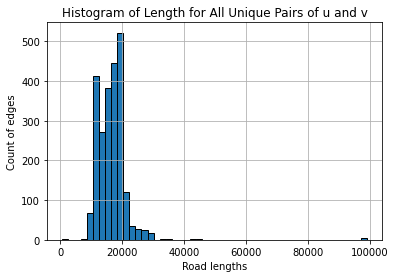

In [22]:
import matplotlib.pyplot as plt

# Get all unique pairs of 'u' and 'v' columns in the DataFrame
pairs_hist = df[['u', 'v']].drop_duplicates().values.tolist()

# Concatenate the length column from all subset DataFrames into a single DataFrame
lengths = pd.concat([df[(df['u'] == u) & (df['v'] == v)]['length'] for u, v in pairs_hist])

# Create a histogram of the concatenated length column
lengths.hist(bins=50, edgecolor='black')
plt.xlabel('Road lengths')
plt.ylabel('Count of edges')
plt.title('Histogram of Length for All Unique Pairs of u and v')
plt.show()



In [23]:
# Get all unique pairs of 'u' and 'v' columns in the DataFrame
pairs_hist = df[['u', 'v']].drop_duplicates().values.tolist()

# Initialize a Boolean variable to keep track of whether any pairs have a length less than 10000
has_short_pairs = False

# Iterate over all unique pairs
for u, v in pairs_hist:
    # Subset the DataFrame to the rows corresponding to this unique pair
    subset_df = df[(df['u'] == u) & (df['v'] == v)]
    # Check if the length column has any values less than 10000
    if (subset_df['length'] < 10000).any():
        has_short_pairs = True
        print(f'Pair {u}-{v} has a length less than 10000')

# Check if any pairs have a length less than 10000
if not has_short_pairs:
    print('All pairs have a length of 10000 or more')


Pair 298536-1220613 has a length less than 10000
Pair 1095954-1007500 has a length less than 10000


In [24]:
# Get all unique pairs of 'u' and 'v' columns in the DataFrame
pairs = df[['u', 'v']].drop_duplicates().values.tolist()

# Initialize a variable to keep track of the count of pairs with length less than 10000
short_pairs_count = 0

# Iterate over all unique pairs
for u, v in pairs:
    # Subset the DataFrame to the rows corresponding to this unique pair
    subset_df = df[(df['u'] == u) & (df['v'] == v)]
    # Check if the length column has any values less than 10000
    if (subset_df['length'] < 10000).any():
        short_pairs_count += 1

# Print the count of unique pairs with length less than 10000
print(f'The count of unique pairs with length less than 10000 is {short_pairs_count}')


The count of unique pairs with length less than 10000 is 2


In [25]:
#Demand per hour if we divide cars charging evenly across all hours of the day

# Create a list of the columns to use
columns_to_use = ['u', 'v', 'charge_cars_jan', 'charge_cars_feb', 'charge_cars_mar', 'charge_cars_apr', 'charge_cars_may', 'charge_cars_jun', 'charge_cars_jul', 'charge_cars_aug', 'charge_cars_sep', 'charge_cars_oct', 'charge_cars_nov', 'charge_cars_dec']

# Create a new DataFrame with the selected columns
new_df = df[columns_to_use].copy()

# Define a function to calculate the number of cars required for each charging station per hour for a given month
def cars_per_hour_month(row, month):
    return row[f'charge_cars_{month}'] / 24

# Iterate over each month and apply the function to each row of the DataFrame for that month
for month in ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']:
    new_df[f'per_hour_{month}'] = new_df.apply(cars_per_hour_month, axis=1, args=(month,))





In [26]:
new_df.head()


# demand_per_hour=new_df

,u,v,charge_cars_jan,charge_cars_feb,charge_cars_mar,charge_cars_apr,charge_cars_may,charge_cars_jun,charge_cars_jul,charge_cars_aug,charge_cars_sep,charge_cars_oct,charge_cars_nov,charge_cars_dec,per_hour_jan,per_hour_feb,per_hour_mar,per_hour_apr,per_hour_may,per_hour_jun,per_hour_jul,per_hour_aug,per_hour_sep,per_hour_oct,per_hour_nov,per_hour_dec
0,794436,735703,338,351,346,335,299,313,217,277,295,336,373,334,14.08333,14.62500,14.41667,13.95833,12.45833,13.04167,9.04167,11.54167,12.29167,14.00000,15.54167,13.91667
1,794436,735703,338,351,346,335,299,313,217,277,295,336,373,334,14.08333,14.62500,14.41667,13.95833,12.45833,13.04167,9.04167,11.54167,12.29167,14.00000,15.54167,13.91667
2,794436,735703,338,351,346,335,299,313,217,277,295,336,373,334,14.08333,14.62500,14.41667,13.95833,12.45833,13.04167,9.04167,11.54167,12.29167,14.00000,15.54167,13.91667
3,794436,735703,338,351,346,335,299,313,217,277,295,336,373,334,14.08333,14.62500,14.41667,13.95833,12.45833,13.04167,9.04167,11.54167,12.29167,14.00000,15.54167,13.91667
4,794436,735703,338,351,346,335,299,313,217,277,295,336,373,334,14.08333,14.62500,14.41667,13.95833,12.45833,13.04167,9.04167,11.54167,12.29167,14.00000,15.54167,13.91667


In [27]:
#Demand per hour if we divide car charging by hours 06:00 to 22:00 of the day

# Create a list of the columns to use
columns_to_use = ['u', 'v', 'charge_cars_jan', 'charge_cars_feb', 'charge_cars_mar', 'charge_cars_apr', 'charge_cars_may', 'charge_cars_jun', 'charge_cars_jul', 'charge_cars_aug', 'charge_cars_sep', 'charge_cars_oct', 'charge_cars_nov', 'charge_cars_dec']

# Create a new DataFrame with the selected columns
new_df = df[columns_to_use].copy()

# Define a function to calculate the number of cars required for each charging station per hour for a given month
def cars_per_hour_month(row, month):
    return row[f'charge_cars_{month}'] / 24

# Iterate over each month and apply the function to each row of the DataFrame for that month
for month in ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']:
    new_df[f'per_hour_{month}'] = new_df.apply(cars_per_hour_month, axis=1, args=(month,))



In [ ]:
df.head()

## In order to calculate supply from charging stations, data needs another format

In [ ]:
import pandas as pd
import json
from json import JSONEncoder

class CustomJSONEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, pd.core.series.Series):
            return obj.tolist()
        return super(CustomJSONEncoder, self).default(obj)

# Assuming your dataframe is called 'df'
charging_cols = ['u', 'v', 'CS_id', 'PowerKW_list', 'Number_Of_Chargers', 'Name']

# Create a new DataFrame with the selected columns
cs_data = df[charging_cols].copy()
# Initialize an empty dictionary to store the data
data_dict = {}

# Iterate through the dataframe rows
for index, row in cs_data.iterrows():
    # Create a key for the unique combination of 'u' and 'v'
    key = f"{row['u']}_{row['v']}"

    # If the key is not in the dictionary, create a new entry
    if key not in data_dict:
        data_dict[key] = {'CS_ids': [], 'PowerKW_lists': []}

    # Append the CS_id and PowerKW_list for the current row to the corresponding lists
    data_dict[key]['CS_ids'].append(row['CS_id'])
    data_dict[key]['PowerKW_lists'].append(row['PowerKW_list'])

# Convert the dictionary to a JSON object
json_data = json.dumps(data_dict, indent=2, cls=CustomJSONEncoder)

# Print the JSON object
print(json_data)


In [44]:
# assume `json_str` contains your JSON formatted string
with open('charging_data.json', 'w') as f:
    f.write(json_data)

#This saves the data in a JSON-formatted structure.
#This can subsequently be used in a function which calculates the supply of chargers per edge

In [ ]:

#Next step: Charging Supply
